# Climate Change Analysis

In [1]:
#import required libraries & Modules
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv('GlobalLandTemperaturesByState.csv')
df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
print(df.dtypes)
print("Shape of data : ",df.shape)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object
Shape of data :  (645675, 5)


In [4]:
#Find the missing value  
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

## fill misssing value with Rolling average

In [5]:

df['new_avg']= df.AverageTemperature.fillna(df.AverageTemperature.rolling(12,center=True,min_periods=1).mean())

In [6]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,new_avg
0,1855-05-01,25.544,1.171,Acre,Brazil,25.544
1,1855-06-01,24.228,1.103,Acre,Brazil,24.228
2,1855-07-01,24.371,1.044,Acre,Brazil,24.371
3,1855-08-01,25.427,1.073,Acre,Brazil,25.427
4,1855-09-01,25.675,1.014,Acre,Brazil,25.675


In [7]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
new_avg                          17795
dtype: int64

In [9]:
#Rename the columns
df.rename(columns={'dt':'Date','new_avg':'Avg_Temp'},inplace=True)

In [10]:
#No of Country and state
df['Country'].nunique() , df['State'].nunique()

(7, 241)

In [11]:
#make Date column  index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='Date', length=645675, freq=None)

In [12]:
df.index.min(),df.index.max()

(Timestamp('1743-11-01 00:00:00'), Timestamp('2013-09-01 00:00:00'))

In [14]:
df.loc['1800':'2013','Avg_Temp'].isnull().sum()

9588

In [15]:
df.loc['1850':'2013','Avg_Temp'].isnull().sum()

2725

In [21]:
df.loc['1900':'2013','Avg_Temp'].isnull().sum()

0

In [22]:
#take data between 1900 to 2013 for analysis
latest_df=df.loc['1900':'2013']
latest_df.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Avg_Temp
Date,,,,,
1900-01-01,25.732,1.080,Acre,Brazil,25.732
1900-02-01,26.050,1.080,Acre,Brazil,26.050
1900-03-01,26.574,0.894,Acre,Brazil,26.574
1900-04-01,25.947,1.192,Acre,Brazil,25.947
1900-05-01,25.557,0.856,Acre,Brazil,25.557


In [23]:
latest_df.shape

(328965, 5)

## Groupby and resampling

In [24]:
latest_df[['Country','Avg_Temp']].groupby(['Country']).mean().sort_values('Avg_Temp')

,Avg_Temp
Country,
Canada,-1.364589
Russia,1.675149
United States,11.062517
China,11.709452
Australia,17.993412
India,22.514323
Brazil,24.070273


In [25]:
#Resample
resample_df=latest_df[['Avg_Temp']].resample('M').mean()
resample_df.head()

,Avg_Temp
Date,
1900-01-31,-3.636041
1900-02-28,-1.508290
1900-03-31,3.822237
1900-04-30,9.343722
1900-05-31,15.124137


In [26]:
resample_df.index.min(),resample_df.index.max()


(Timestamp('1900-01-31 00:00:00', freq='M'),
 Timestamp('2013-09-30 00:00:00', freq='M'))

In [27]:
resample_df.shape

(1365, 1)

In [28]:
resample_df.describe()

,Avg_Temp
count,1365.000000
mean,9.769515
std,8.138670
min,-5.200544
25%,2.390133
50%,10.419664
75%,17.791685
max,22.444606


In [29]:
resample_df.isnull().sum()

Avg_Temp    0
dtype: int64

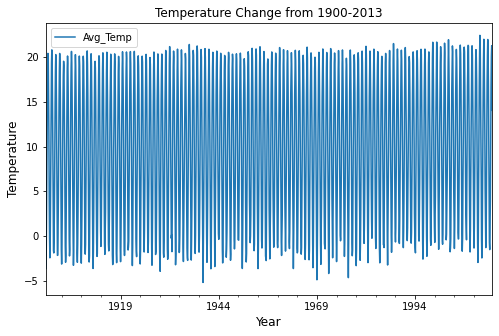

In [30]:
#Plot 
resample_df.plot(title='Temperature Change from 1900-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# Climate change forcasting


# ARIMA

In [31]:
resample_df.head()

,Avg_Temp
Date,
1900-01-31,-3.636041
1900-02-28,-1.508290
1900-03-31,3.822237
1900-04-30,9.343722
1900-05-31,15.124137


In [32]:
resample_df.shape

(1365, 1)

In [33]:
#AUTO ARIMA
!pip install pmdarima

In [34]:
y=resample_df.Avg_Temp.values

In [35]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [36]:
train, test = train_test_split(resample_df, train_size=int(0.9 * resample_df.shape[0]))

In [37]:
train.shape,test.shape

((1228, 1), (137, 1))

In [38]:
# Fit your model
model = pm.auto_arima( train, start_p=5, max_p=10, seasonal=True, trace = True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=3342.113, Time=2.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8635.867, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6977.983, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=7240.492, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9712.675, Time=0.02 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=3349.719, Time=1.83 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=3322.094, Time=2.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=3335.325, Time=1.98 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=3301.430, Time=2.15 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=3275.153, Time=2.60 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=3277.912, Time=3.01 sec
 ARIMA(7,0,2)(0,0,0)[0] intercept   : AIC=3228.9

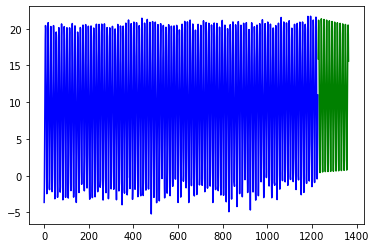

In [40]:
# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(resample_df.shape[0])
plt.plot(x[:1228], train, c='blue')
plt.plot(x[1228:], forecasts, c='green')
plt.show()

In [41]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [42]:
train_size = int(0.9 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

In [44]:
model = ARIMA(train, order=(10,0,1))#order is p,d,q #10,0,1
model_fit = model.fit()
output = model_fit.forecast(test_size)
output

2002-05-31    15.819899
2002-06-30    19.317786
2002-07-31    20.983649
2002-08-31    19.992936
2002-09-30    16.655180
                ...    
2013-05-31    14.726002
2013-06-30    18.063769
2013-07-31    19.262804
2013-08-31    18.005636
2013-09-30    14.632700
Freq: M, Name: predicted_mean, Length: 137, dtype: float64

In [45]:
output[0]

15.819899003908864

In [46]:
mean_squared_error(test,output)

2.3346210928618008

In [47]:
mean_squared_error(test,output)**0.5

1.5279466917604818

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(test,output)

0.703441298569223

In [49]:
# save model
model_fit.save('climate_final.pkl')

#  Apply regression on TS using lag values

In [50]:
reg_data=resample_df.copy()

In [51]:
reg_data.head()

,Avg_Temp
Date,
1900-01-31,-3.636041
1900-02-28,-1.508290
1900-03-31,3.822237
1900-04-30,9.343722
1900-05-31,15.124137


In [52]:
reg_data.shape

(1365, 1)

In [53]:
reg_data.columns

Index(['Avg_Temp'], dtype='object')

In [54]:
reg_data['lag1']=reg_data['Avg_Temp'].shift(1)
reg_data['lag2']=reg_data['Avg_Temp'].shift(2)
reg_data['lag3']=reg_data['Avg_Temp'].shift(3)
reg_data['lag4']=reg_data['Avg_Temp'].shift(4)
reg_data['lag5']=reg_data['Avg_Temp'].shift(5)

In [55]:
reg_data.head(10)

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1900-01-31,-3.636041,NaN,NaN,NaN,NaN,NaN
1900-02-28,-1.508290,-3.636041,NaN,NaN,NaN,NaN
1900-03-31,3.822237,-1.508290,-3.636041,NaN,NaN,NaN
1900-04-30,9.343722,3.822237,-1.508290,-3.636041,NaN,NaN
1900-05-31,15.124137,9.343722,3.822237,-1.508290,-3.636041,NaN
1900-06-30,18.517220,15.124137,9.343722,3.822237,-1.508290,-3.636041
1900-07-31,20.427950,18.517220,15.124137,9.343722,3.822237,-1.508290
1900-08-31,20.029033,20.427950,18.517220,15.124137,9.343722,3.822237
1900-09-30,15.698465,20.029033,20.427950,18.517220,15.124137,9.343722


In [70]:
df_r=reg_data.loc['1900-06-30':,:]

In [71]:
df_r.shape

(1360, 6)

In [72]:
df_r.columns

Index(['Avg_Temp', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5'], dtype='object')

In [73]:
df_r.head()

,Avg_Temp,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
1900-06-30,18.517220,15.124137,9.343722,3.822237,-1.508290,-3.636041
1900-07-31,20.427950,18.517220,15.124137,9.343722,3.822237,-1.508290
1900-08-31,20.029033,20.427950,18.517220,15.124137,9.343722,3.822237
1900-09-30,15.698465,20.029033,20.427950,18.517220,15.124137,9.343722
1900-10-31,11.352120,15.698465,20.029033,20.427950,18.517220,15.124137


#  X & Y split 

In [74]:
X = df_r.drop(['Avg_Temp'],axis=1)
Y = df_r['Avg_Temp']

In [75]:
X.shape, Y.shape

((1360, 5), (1360,))

In [76]:
size = int(len(X) * 0.9)
X_train, X_test = X[0:size], X[size:len(X)]
Y_train, Y_test = Y[0:size], Y[size:len(X)]

In [77]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((1224, 5), (136, 5), (1224,), (136,))

#  Apply regression algorithm

## Linear regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
reg = LinearRegression().fit(X_train, Y_train)

In [80]:
Y_pred = reg.predict(X_test)

In [81]:
mean_squared_error(Y_test,Y_pred)

1.4631288081532026

In [82]:
mean_squared_error(Y_test,Y_pred)**0.5

1.2095986144805237

In [83]:
mean_absolute_percentage_error(Y_test,Y_pred)

0.4290697452231027

## RandomForestRegressor

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 7)

In [85]:
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=7)

In [86]:
Y_pred_rfr = rfr.predict(X_test)

In [87]:
mean_squared_error(Y_test,Y_pred_rfr)

1.0503085461102142

In [88]:
mean_squared_error(Y_test,Y_pred_rfr)**0.5

1.0248456206230352

In [89]:
mean_absolute_percentage_error(Y_test,Y_pred_rfr)

0.37123014451587755

# RNN/LSTM_Time_series

In [90]:
resample_df.head()

,Avg_Temp
Date,
1900-01-31,-3.636041
1900-02-28,-1.508290
1900-03-31,3.822237
1900-04-30,9.343722
1900-05-31,15.124137


<AxesSubplot:xlabel='Date'>

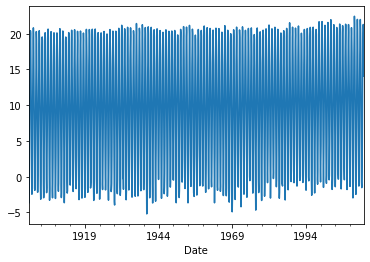

In [91]:
resample_df['Avg_Temp'].plot()

In [92]:
rnn_data=resample_df[['Avg_Temp']].copy()

In [93]:
rnn_data.shape

(1365, 1)

In [94]:
rnn_data.head()

,Avg_Temp
Date,
1900-01-31,-3.636041
1900-02-28,-1.508290
1900-03-31,3.822237
1900-04-30,9.343722
1900-05-31,15.124137


In [95]:
dataset_train = rnn_data.iloc[:2565,:]
dataset_train.shape

(1365, 1)

In [96]:
# Convert data frame / series to numpy array
training_set = dataset_train.iloc[:, 0].values
training_set[:5]

array([-3.63604149, -1.50829046,  3.82223651,  9.34372199, 15.12413693])

In [97]:
training_set.shape

(1365,)

# Add extra dimemsion to the data for processing in RNN / LSTM neuron

In [98]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [99]:
training_set[:5]

array([[-3.63604149],
       [-1.50829046],
       [ 3.82223651],
       [ 9.34372199],
       [15.12413693]])

In [100]:
training_set.shape

(1365, 1)

<AxesSubplot:>

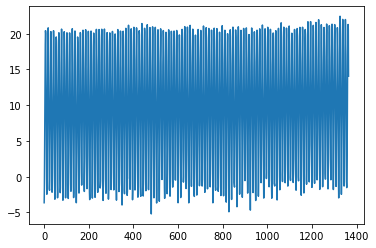

In [101]:
pd.Series(training_set.flat).plot()

In [102]:
#Transform time series for having lag values and output variable

In [103]:
timesteps=5 # How many lag Values to train the data
trn_size = dataset_train.shape[0]

In [104]:
# add lag values to train dataset
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set[i-timesteps:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [105]:
X_train.shape

(1360, 5)

In [106]:
y_train.shape

(1360,)

In [107]:
X_train[:1]

array([[-3.63604149, -1.50829046,  3.82223651,  9.34372199, 15.12413693]])

In [108]:
y_train[:1]

array([18.51721992])

In [109]:
pd.DataFrame(X_train).head()

,0,1,2,3,4
0,-3.636041,-1.508290,3.822237,9.343722,15.124137
1,-1.508290,3.822237,9.343722,15.124137,18.517220
2,3.822237,9.343722,15.124137,18.517220,20.427950
3,9.343722,15.124137,18.517220,20.427950,20.029033
4,15.124137,18.517220,20.427950,20.029033,15.698465


## Reshape X_train to add extra dimension

In [110]:
#It is added to be processed easily by RNN / LSTM
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [111]:
X_train.shape

(1360, 5, 1)

In [112]:
X_train[:1]

array([[[-3.63604149],
        [-1.50829046],
        [ 3.82223651],
        [ 9.34372199],
        [15.12413693]]])

## Building the RNN / LSTM

In [113]:
import tensorflow as tf
from tensorflow import keras

In [114]:
type(X_train)

numpy.ndarray

In [115]:
(X_train.shape[1],X_train.shape[2])

(5, 1)

In [116]:
#create the model

model_lstm = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm.add(keras.layers.LSTM(units=10,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [117]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


## Fitting the RNN to the Training set

In [118]:
history = model_lstm.fit( X_train, y_train, validation_split=0.1,epochs = 50, batch_size = 5)

Epoch 1/50
245/245 [==============================] - 3s 5ms/step - loss: 140.8714 - val_loss: 120.4233
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 83.0964 - val_loss: 81.9433
Epoch 3/50
245/245 [==============================] - 1s 3ms/step - loss: 57.2568 - val_loss: 53.0346
Epoch 4/50
245/245 [==============================] - 1s 3ms/step - loss: 29.2643 - val_loss: 22.7286
Epoch 5/50
245/245 [==============================] - 1s 3ms/step - loss: 13.4027 - val_loss: 15.0006
Epoch 6/50
245/245 [==============================] - 1s 3ms/step - loss: 8.7709 - val_loss: 11.6704
Epoch 7/50
245/245 [==============================] - 1s 3ms/step - loss: 6.0063 - val_loss: 8.3370
Epoch 8/50
245/245 [==============================] - 1s 3ms/step - loss: 4.1208 - val_loss: 5.9909
Epoch 9/50
245/245 [==============================] - 1s 3ms/step - loss: 2.8825 - val_loss: 4.4195
Epoch 10/50
245/245 [==============================] - 1s 3ms/step - loss: 2.1410 - val

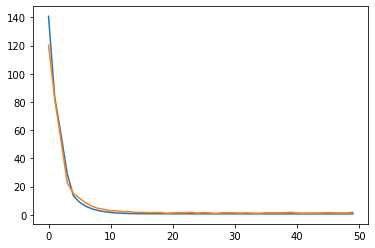

In [119]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#  Tunning LSTM

In [120]:
#create the model

model_lstm1 = keras.Sequential()

# Adding LSTM layers
# inputlayer()
model_lstm1.add(keras.layers.LSTM(units=20,#return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))

# Adding the output layer
model_lstm1.add(keras.layers.Dense(1))

# Compiling the RNN
model_lstm1.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [121]:
model_lstm1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 20)                1760      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = model_lstm1.fit( X_train, y_train, validation_split=0.1,epochs = 50, batch_size = 10)

Epoch 1/50
123/123 [==============================] - 2s 7ms/step - loss: 126.4639 - val_loss: 103.1838
Epoch 2/50
123/123 [==============================] - 0s 4ms/step - loss: 62.2897 - val_loss: 55.2754
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 34.7134 - val_loss: 34.9533
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 20.0923 - val_loss: 20.3267
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 10.5684 - val_loss: 10.4875
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 5.6923 - val_loss: 7.0307
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 3.6044 - val_loss: 5.1307
Epoch 8/50
123/123 [==============================] - 0s 3ms/step - loss: 2.4924 - val_loss: 3.9230
Epoch 9/50
123/123 [==============================] - 0s 3ms/step - loss: 1.7893 - val_loss: 3.3388
Epoch 10/50
123/123 [==============================] - 0s 3ms/step - loss: 1.3691 - val_

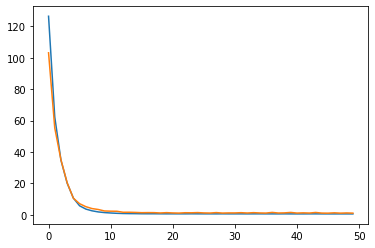

In [123]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])